# Insurance Claims- Fraud Detection

Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

# Importing library

In [35]:
## import all necessary library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Loading dataset

In [36]:
df=pd.read_csv('Automobile_insurance_fraud.csv')

In [37]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [38]:
df.shape

(1000, 40)

In [39]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [40]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

# Checking null values

In [42]:
df.isnull()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [43]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

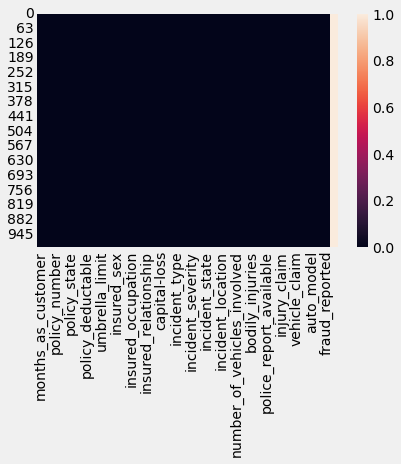

In [44]:
sns.heatmap(df.isnull())

Observation : There is no any null values in this dataset.

In [45]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


# EDA

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

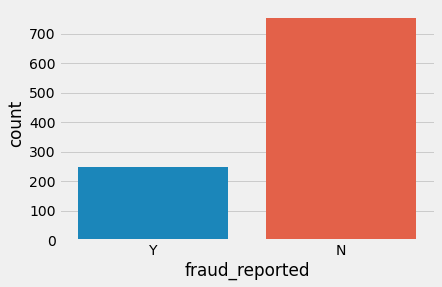

In [46]:
sns.countplot(df['fraud_reported'])

In [47]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

Observation : From above analysis, it can be seen that fraud reported data is very less in comparision of not fraud reported data.

In [48]:
df['incident_state'].value_counts()


NY    262
SC    248
WV    217
VA    110
NC    110
PA     30
OH     23
Name: incident_state, dtype: int64

<AxesSubplot:xlabel='incident_state', ylabel='count'>

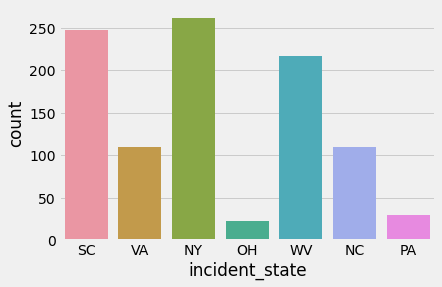

In [49]:
sns.countplot(df['incident_state'])

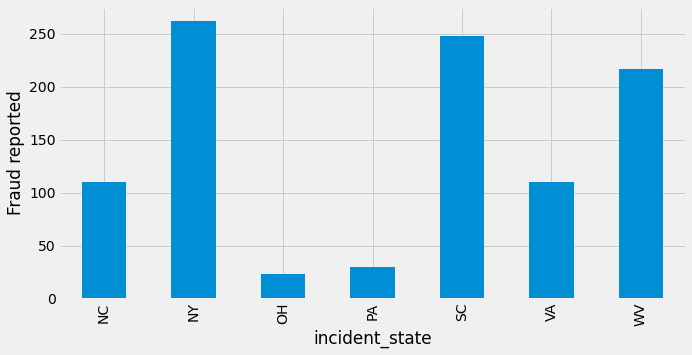

In [50]:

fig = plt.figure(figsize=(10,5))
ax = df.groupby('incident_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

Observation : More fraud is reported in NY and SC state.

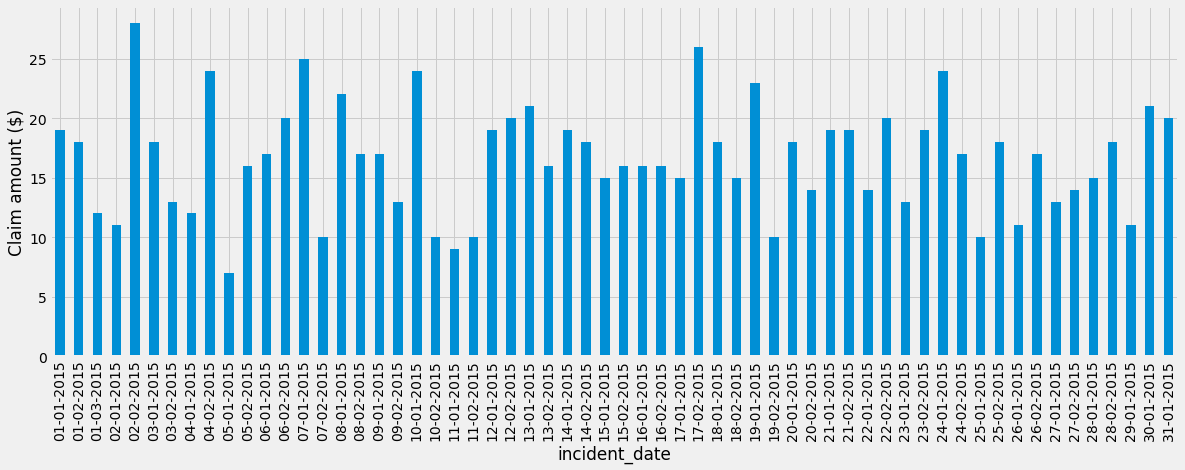

In [51]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(18,6))
ax = df.groupby('incident_date').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Claim amount ($)')
plt.show()

Observation : More claim amount is reported during jan and feb month of the year 2015. 

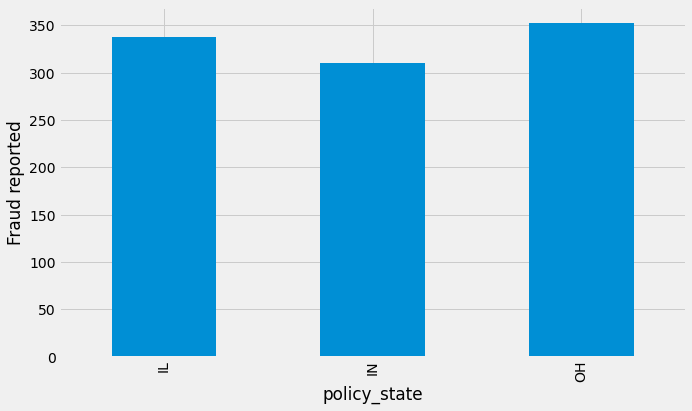

In [52]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('policy_state').fraud_reported.count().plot.bar(ylim=0)
ax.set_ylabel('Fraud reported')
plt.show()

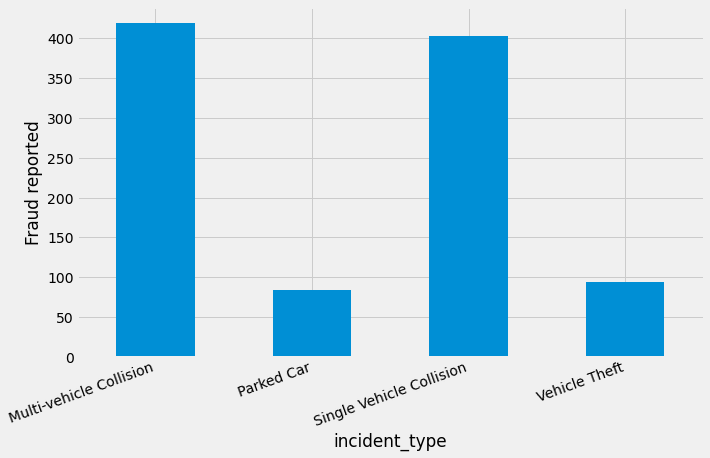

In [53]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax = df.groupby('incident_type').fraud_reported.count().plot.bar(ylim=0)
ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
ax.set_ylabel('Fraud reported')
plt.show()

Observation : Fraud reporting can be found higher in Multi-vehicle collision and single vehicle collision.

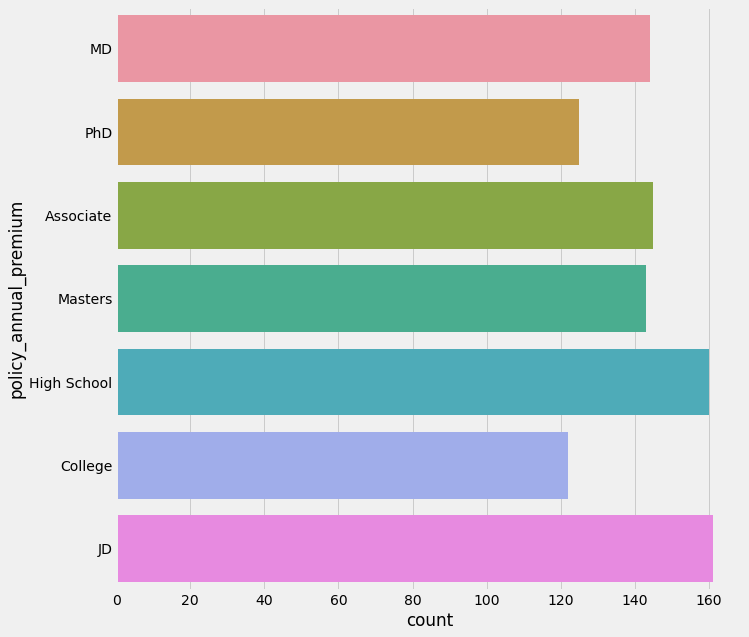

In [54]:
fig = plt.figure(figsize=(10,10))
ax = sns.countplot(y = 'insured_education_level', data=df) 
ax.set_ylabel('policy_annual_premium')
plt.show()

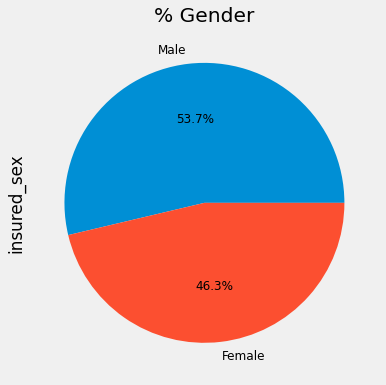

In [55]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_sex'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Male', 'Female'], fontsize=12)                                                                           
ax.set_title('% Gender')
plt.show()

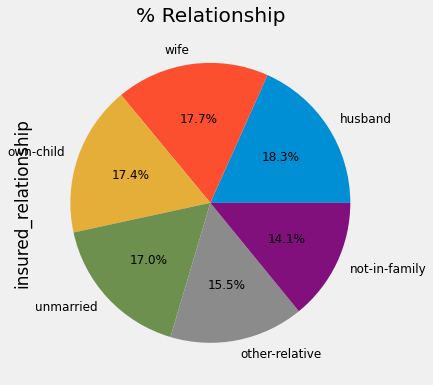

In [56]:
fig = plt.figure(figsize=(10,6))
ax = (df['insured_relationship'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['husband', 'wife', 'own-child', 'unmarried', 'other-relative', 'not-in-family'],
         fontsize=12)                                                                           
ax.set_title('% Relationship')
plt.show()

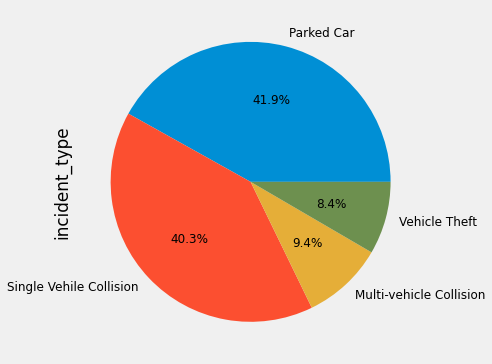

In [57]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_type'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Parked Car', 'Single Vehile Collision', 'Multi-vehicle Collision', 'Vehicle Theft'],
         fontsize=12) 

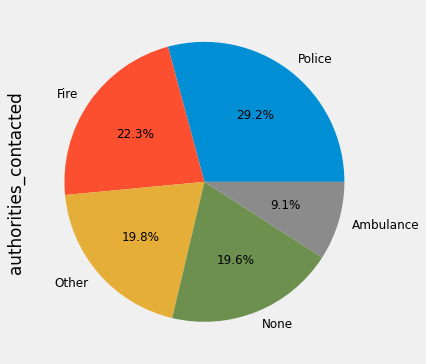

In [58]:
fig = plt.figure(figsize=(10,6))
ax = (df['authorities_contacted'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Police', 'Fire', 'Other', 'None', 'Ambulance'],
         fontsize=12) 

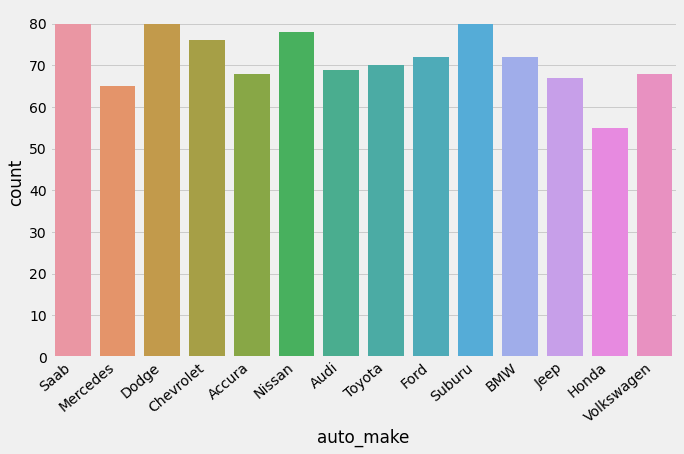

In [59]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='auto_make', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

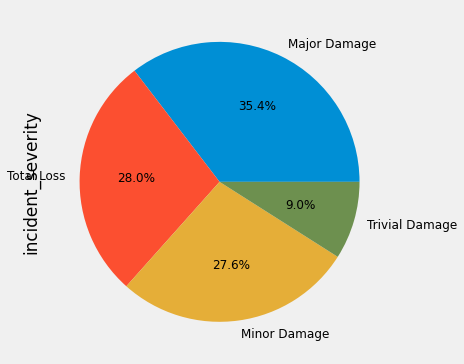

In [60]:
fig = plt.figure(figsize=(10,6))
ax = (df['incident_severity'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['Major Damage', 'Total Loss', 'Minor Damage', 'Trivial Damage'],
         fontsize=12)  

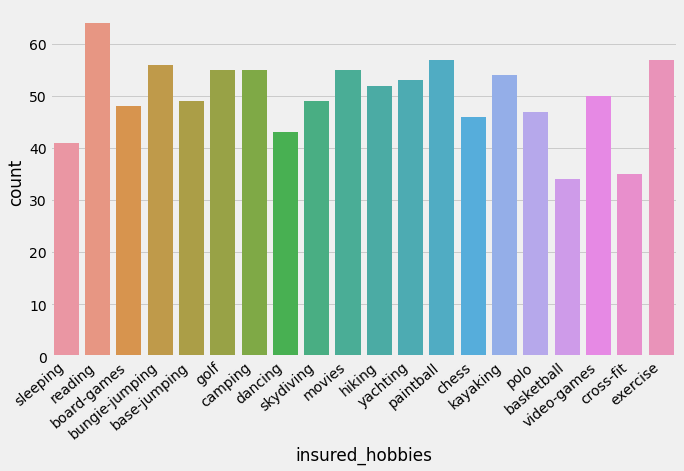

In [61]:
fig = plt.figure(figsize=(10,6))
ax = sns.countplot(x='insured_hobbies', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [62]:
df["insured_occupation"].value_counts()

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64

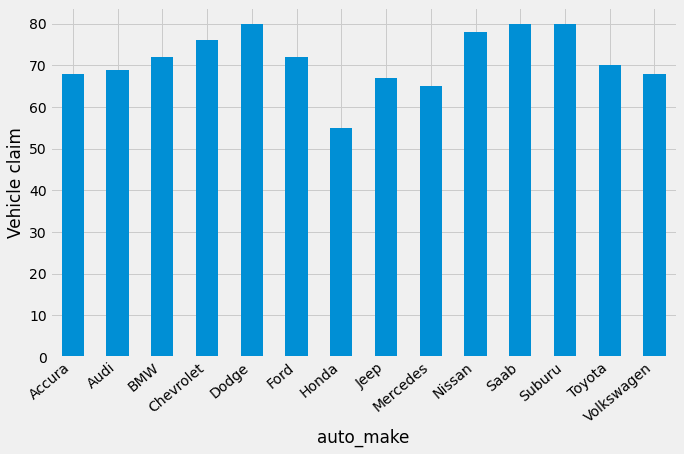

In [63]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('auto_make').vehicle_claim.count().plot.bar(ylim=0)
ax.set_ylabel('Vehicle claim')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

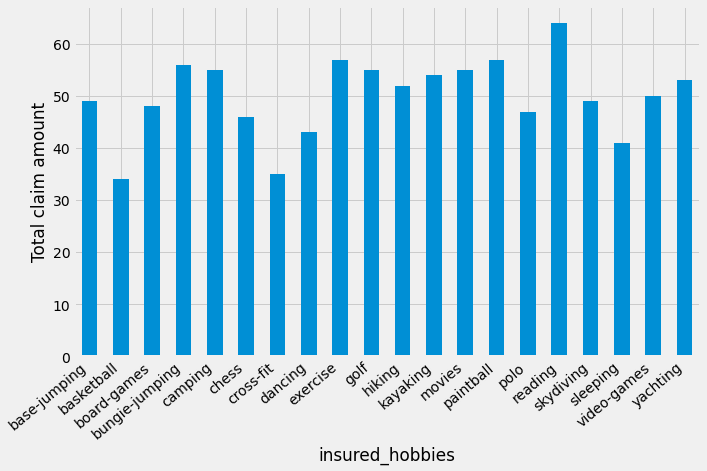

In [64]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(10,6))
ax= df.groupby('insured_hobbies').total_claim_amount.count().plot.bar(ylim=0)
ax.set_ylabel('Total claim amount')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [65]:
df = df.drop(columns = [
    'policy_number', 
    'insured_zip', 
    'policy_bind_date', 
    'incident_date', 
    'incident_location', 
    '_c39', 
    'auto_year', 
    'incident_hour_of_the_day'])

In [66]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,250/500,1000,1406.91,0,MALE,MD,craft-repair,...,1,2,YES,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,...,0,0,?,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,...,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,...,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,500/1000,1000,1583.91,6000000,MALE,Associate,sales,...,0,1,NO,6500,1300,650,4550,Accura,RSX,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,OH,500/1000,1000,1310.80,0,FEMALE,Masters,craft-repair,...,0,1,?,87200,17440,8720,61040,Honda,Accord,N
996,285,41,IL,100/300,1000,1436.79,0,FEMALE,PhD,prof-specialty,...,2,3,?,108480,18080,18080,72320,Volkswagen,Passat,N
997,130,34,OH,250/500,500,1383.49,3000000,FEMALE,Masters,armed-forces,...,2,3,YES,67500,7500,7500,52500,Suburu,Impreza,N
998,458,62,IL,500/1000,2000,1356.92,5000000,MALE,Associate,handlers-cleaners,...,0,1,YES,46980,5220,5220,36540,Audi,A5,N


In [67]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
number_of_vehicles_involved      int64
property_damage                 object
bodily_injuries                  int64
witnesses                        int64
police_report_available         object
total_claim_amount       

In [68]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'fraud_reported'],
      dtype='object')

# Checking for distribution

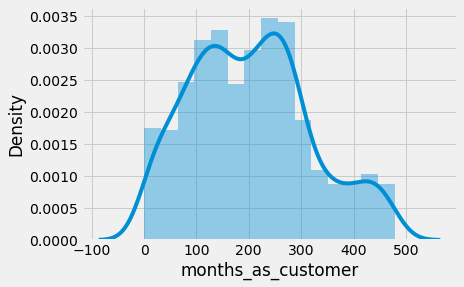

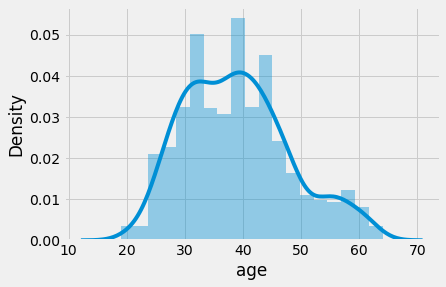

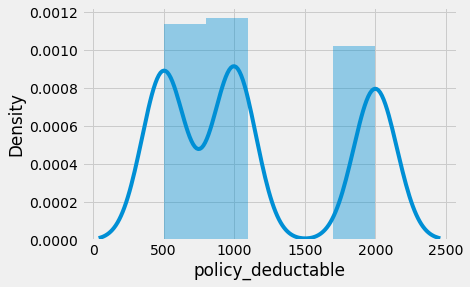

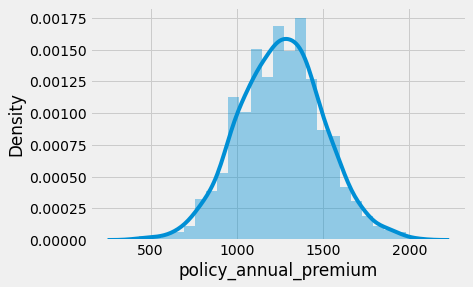

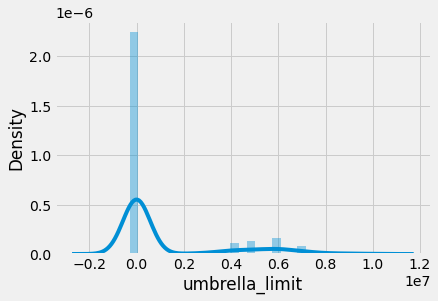

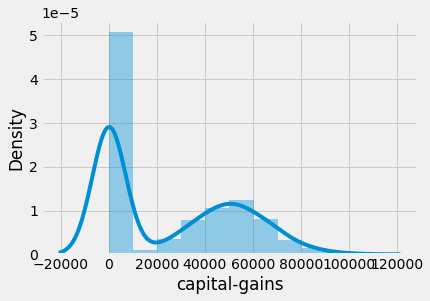

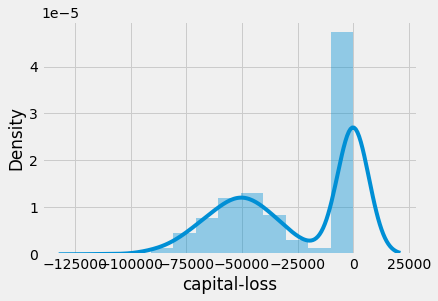

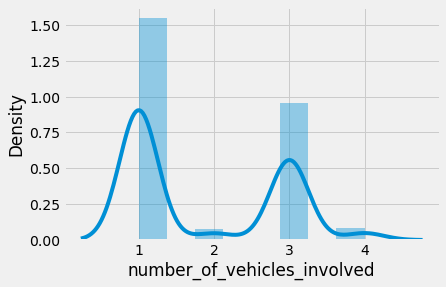

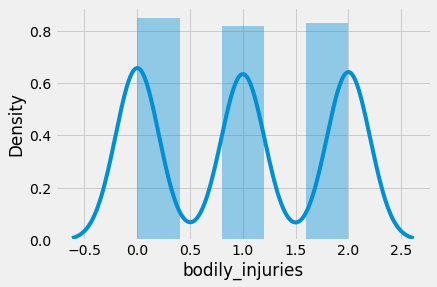

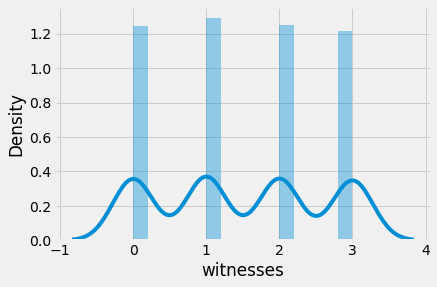

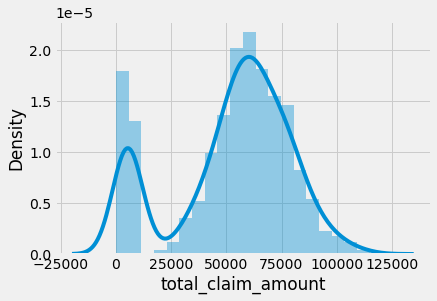

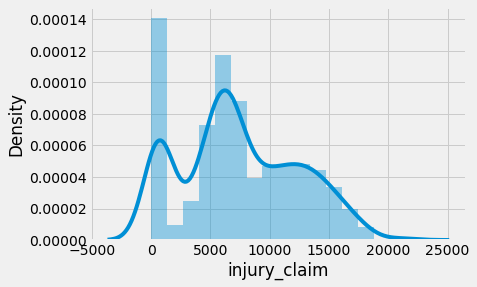

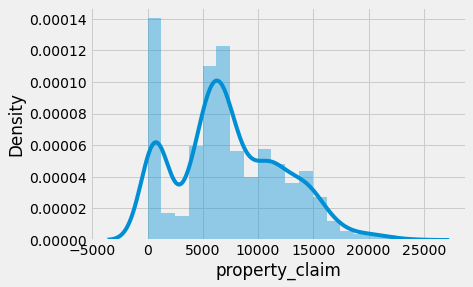

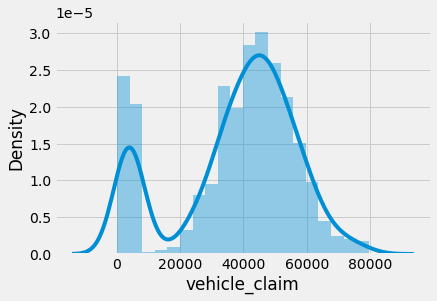

In [69]:
for i in df.describe().columns:
    sns.distplot(df[i])
    plt.show()

In [70]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
dtype: float64

# Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
cols = [ 'policy_state', 'policy_csl','insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship',  'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city','property_damage',
       'police_report_available',  'auto_make', 'auto_model','fraud_reported']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [72]:
df

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,1,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,1,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,0


# Boxplot to check outliers

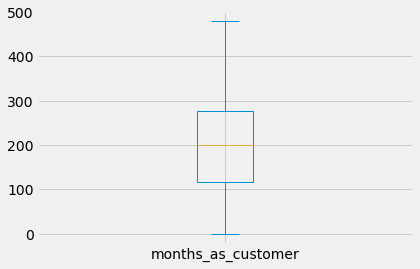

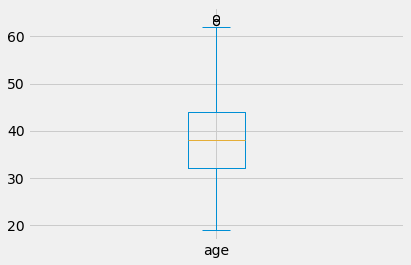

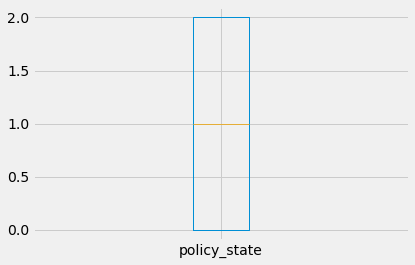

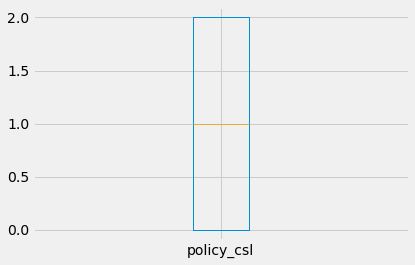

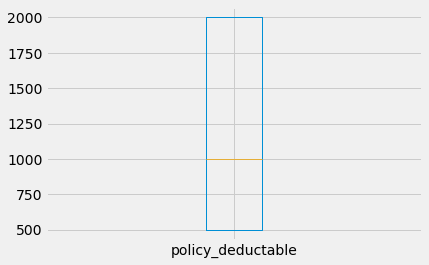

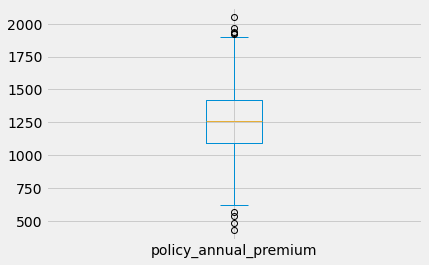

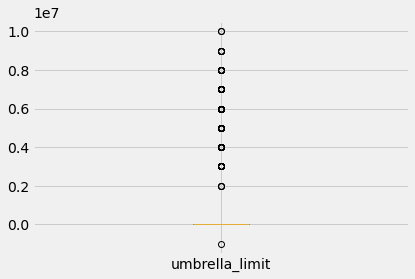

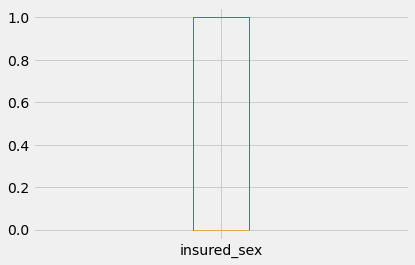

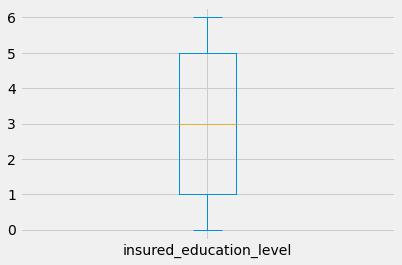

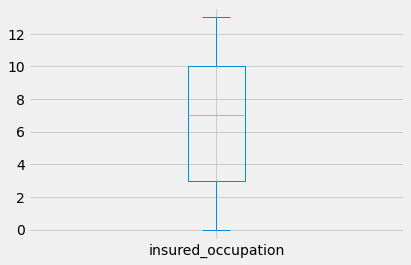

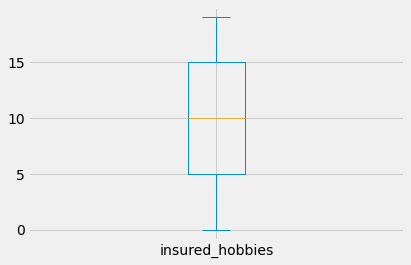

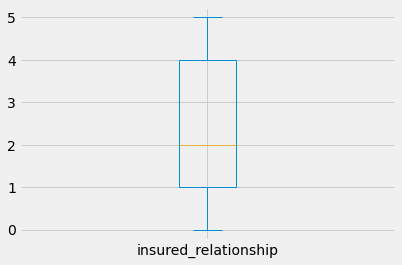

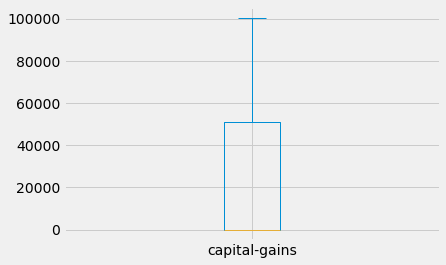

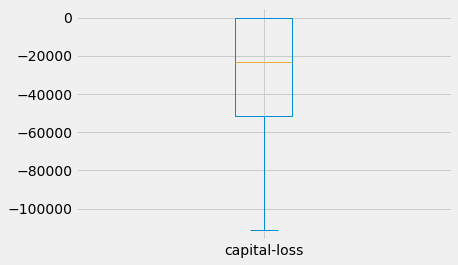

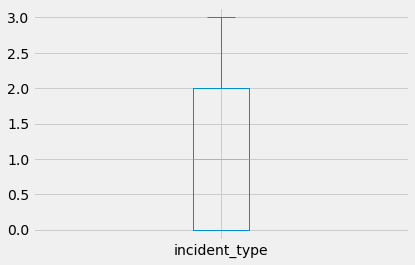

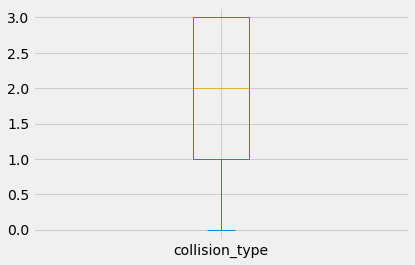

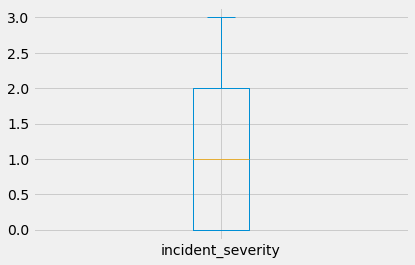

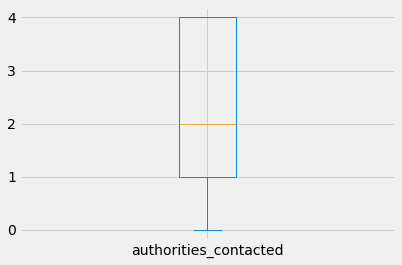

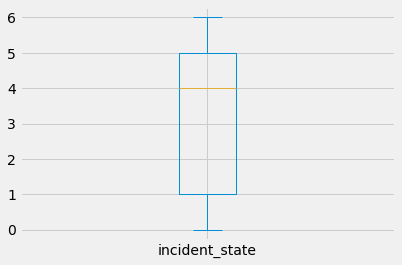

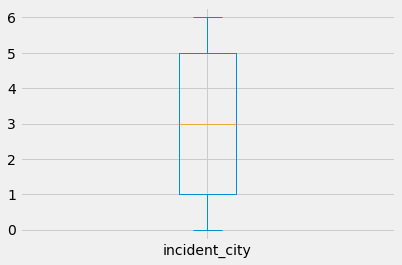

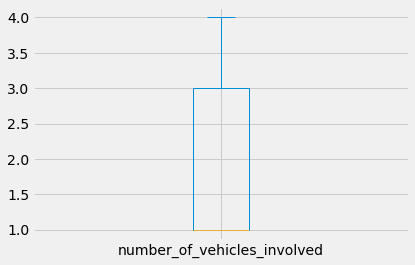

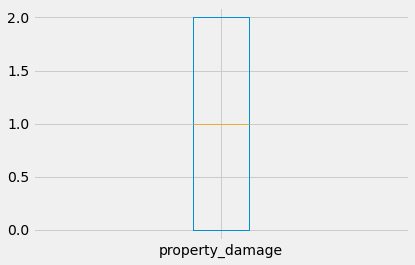

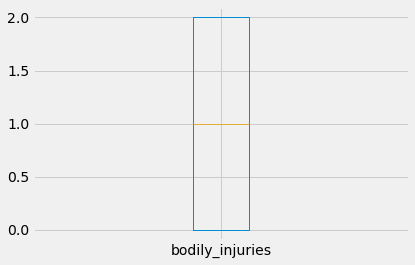

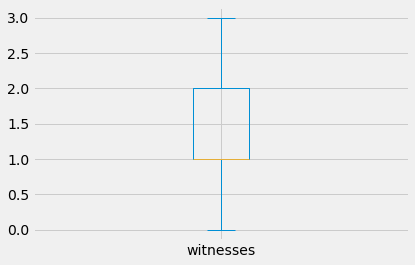

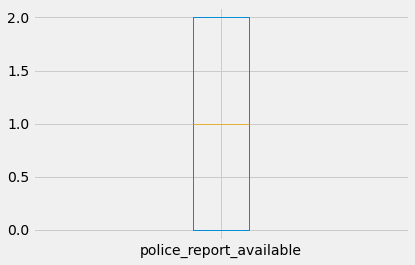

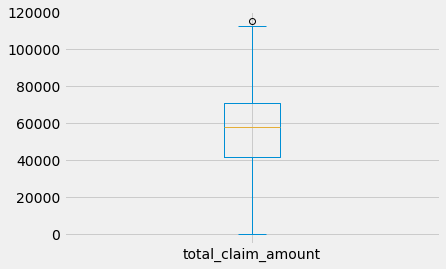

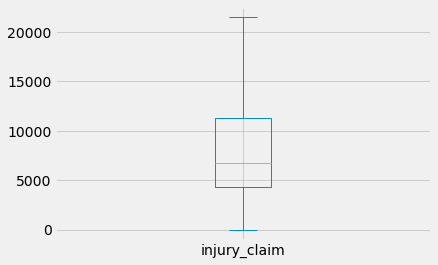

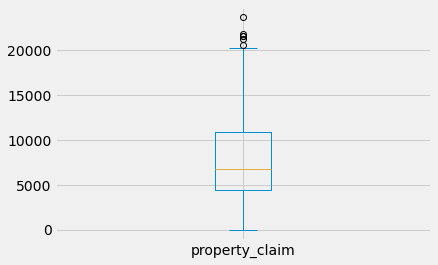

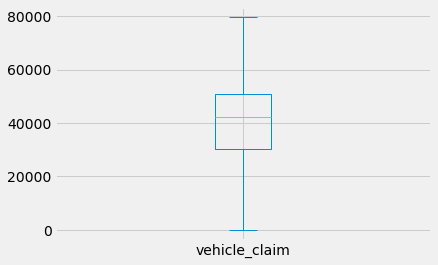

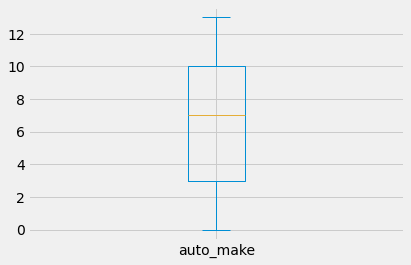

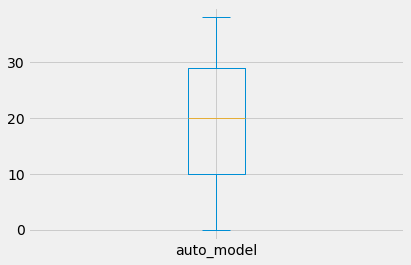

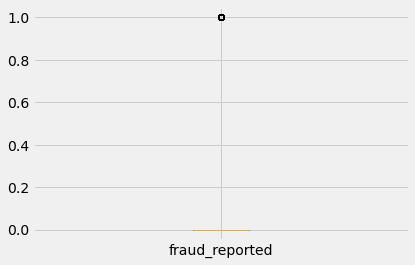

In [73]:
for i in df.describe().columns:
    df[i].plot.box()
    plt.show()

Observation : Outliers are present.

# Removal of outliers

In [74]:
import numpy as np
from scipy.stats import zscore
z=np.abs(zscore(df))
z

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,1.078140,0.990836,1.187173,0.060937,0.222383,0.616705,0.479476,1.076953,0.530931,1.158316,...,0.009759,0.461838,1.270313,0.714257,0.189283,1.165505,0.749653,0.856466,1.645743,1.746019
1,0.208995,0.334073,0.016856,0.060937,1.412784,0.242521,1.697980,1.076953,0.530931,0.162558,...,1.210174,1.338700,1.198712,1.807312,1.363822,1.372696,1.823346,0.360539,0.657470,1.746019
2,0.608002,1.088913,1.187173,1.182668,1.412784,0.642233,1.697980,0.928546,1.557877,1.082141,...,1.229693,1.362107,0.035801,0.686362,0.054644,0.736072,0.785565,0.631315,0.959702,0.572731
3,0.452355,0.224613,1.220886,0.060937,1.412784,0.652886,2.133471,0.928546,1.557877,1.407256,...,0.009759,0.461838,0.035801,0.403135,0.224130,0.219722,0.677607,0.879279,1.319074,1.746019
4,0.208995,0.552994,1.220886,1.304542,0.222383,1.341980,2.133471,1.076953,1.522961,1.082141,...,1.210174,0.438431,0.035801,1.753121,1.257232,1.399654,1.768252,1.623169,1.049545,0.572731
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1.746582,0.103769,1.187173,1.304542,0.222383,0.222884,0.479476,0.928546,1.044404,1.158316,...,1.210174,0.438431,1.198712,1.305049,2.051155,0.273817,1.224309,0.135388,1.196528,0.572731
996,0.704407,0.224613,1.220886,1.182668,0.222383,0.739141,0.479476,0.928546,1.557877,0.584261,...,1.229693,1.362107,1.198712,2.111466,2.182342,2.214794,1.821868,1.600357,0.780016,0.572731
997,0.642767,0.541611,1.187173,0.060937,1.039966,0.520739,0.826998,0.928546,1.044404,1.407256,...,1.229693,1.362107,1.270313,0.558507,0.013648,0.020826,0.771902,1.104430,0.028570,0.572731
998,2.208028,2.523284,1.220886,1.304542,1.412784,0.411866,1.697980,1.076953,1.522961,0.411497,...,1.210174,0.438431,1.270313,0.219110,0.453708,0.451976,0.073580,1.375206,1.286371,0.572731


In [75]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 6,  6,  6,  6,  6,  5,  5,  6,  6,  6,  6, 27,  6,  6,  6,  5, 13,
        6,  6,  6], dtype=int64))


In [76]:
z.iloc[31,6]

3.0044538458871766

In [77]:
z.iloc[88,6]

3.4399450541618797

In [78]:
df1=df[(z<3).all(axis=1)]
df1

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,2,1,1000,1406.91,0,1,4,2,...,1,2,2,71610,6510,13020,52080,10,1,1
1,228,42,1,1,2000,1197.22,5000000,1,4,6,...,0,0,0,5070,780,780,3510,8,12,1
2,134,29,2,0,2000,1413.14,5000000,0,6,11,...,2,3,1,34650,7700,3850,23100,4,30,0
3,256,41,0,1,2000,1415.74,6000000,0,6,1,...,1,2,1,63400,6340,6340,50720,3,34,1
4,228,44,0,2,1000,1583.91,6000000,1,0,11,...,0,1,1,6500,1300,650,4550,0,31,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1000,1310.80,0,0,5,2,...,0,1,0,87200,17440,8720,61040,6,6,0
996,285,41,0,0,1000,1436.79,0,0,6,9,...,2,3,0,108480,18080,18080,72320,13,28,0
997,130,34,2,1,500,1383.49,3000000,0,5,1,...,2,3,2,67500,7500,7500,52500,11,19,0
998,458,62,0,2,2000,1356.92,5000000,1,0,5,...,0,1,2,46980,5220,5220,36540,1,5,0


In [108]:
dfcor=df.corr()

In [109]:
dfcor

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
months_as_customer,1.000000,0.922098,-0.000328,-0.026819,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,...,-0.010162,0.058383,0.017647,0.062108,0.065329,0.034940,0.061013,0.047655,0.004202,0.020544
age,0.922098,1.000000,-0.014533,-0.015185,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,...,-0.015679,0.052359,0.014661,0.069863,0.075522,0.060898,0.062588,0.030410,0.017343,0.012143
policy_state,-0.000328,-0.014533,1.000000,0.001027,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,...,0.013384,0.022960,0.071950,-0.006002,-0.046290,0.008406,0.001425,0.017124,-0.025253,0.029432
policy_csl,-0.026819,-0.015185,0.001027,1.000000,0.003384,0.023978,0.021636,-0.010757,0.009153,0.015788,...,-0.000595,0.071500,0.002424,-0.055758,-0.078818,-0.042216,-0.046791,-0.004701,0.047885,-0.037190
policy_deductable,0.026807,0.029188,0.010033,0.003384,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,...,-0.022765,0.066639,0.030166,0.022839,0.039107,0.064792,0.005269,-0.035379,-0.003268,0.014817
policy_annual_premium,0.005018,0.014404,0.012455,0.023978,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,...,0.026780,0.002332,0.013624,0.009094,-0.017633,-0.011654,0.020246,0.000045,-0.031849,-0.014480
umbrella_limit,0.015498,0.018126,-0.029580,0.021636,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,...,0.022743,-0.006738,-0.055951,-0.040344,-0.045412,-0.023790,-0.038584,-0.004443,0.040256,0.058622
insured_sex,0.060925,0.073337,-0.020481,-0.010757,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,...,-0.020297,0.042463,0.020864,-0.023727,0.000924,-0.014868,-0.029609,0.026457,-0.018421,0.030873
insured_education_level,-0.000833,0.000969,-0.034327,0.009153,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,...,-0.012072,0.019211,0.036141,0.074226,0.081880,0.055794,0.068348,0.055202,0.049445,0.008808
insured_occupation,0.009814,0.017220,-0.031215,0.015788,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,...,-0.000236,-0.014794,-0.011083,0.003692,0.020211,0.003004,-0.000829,0.042621,0.020584,0.001564


<AxesSubplot:>

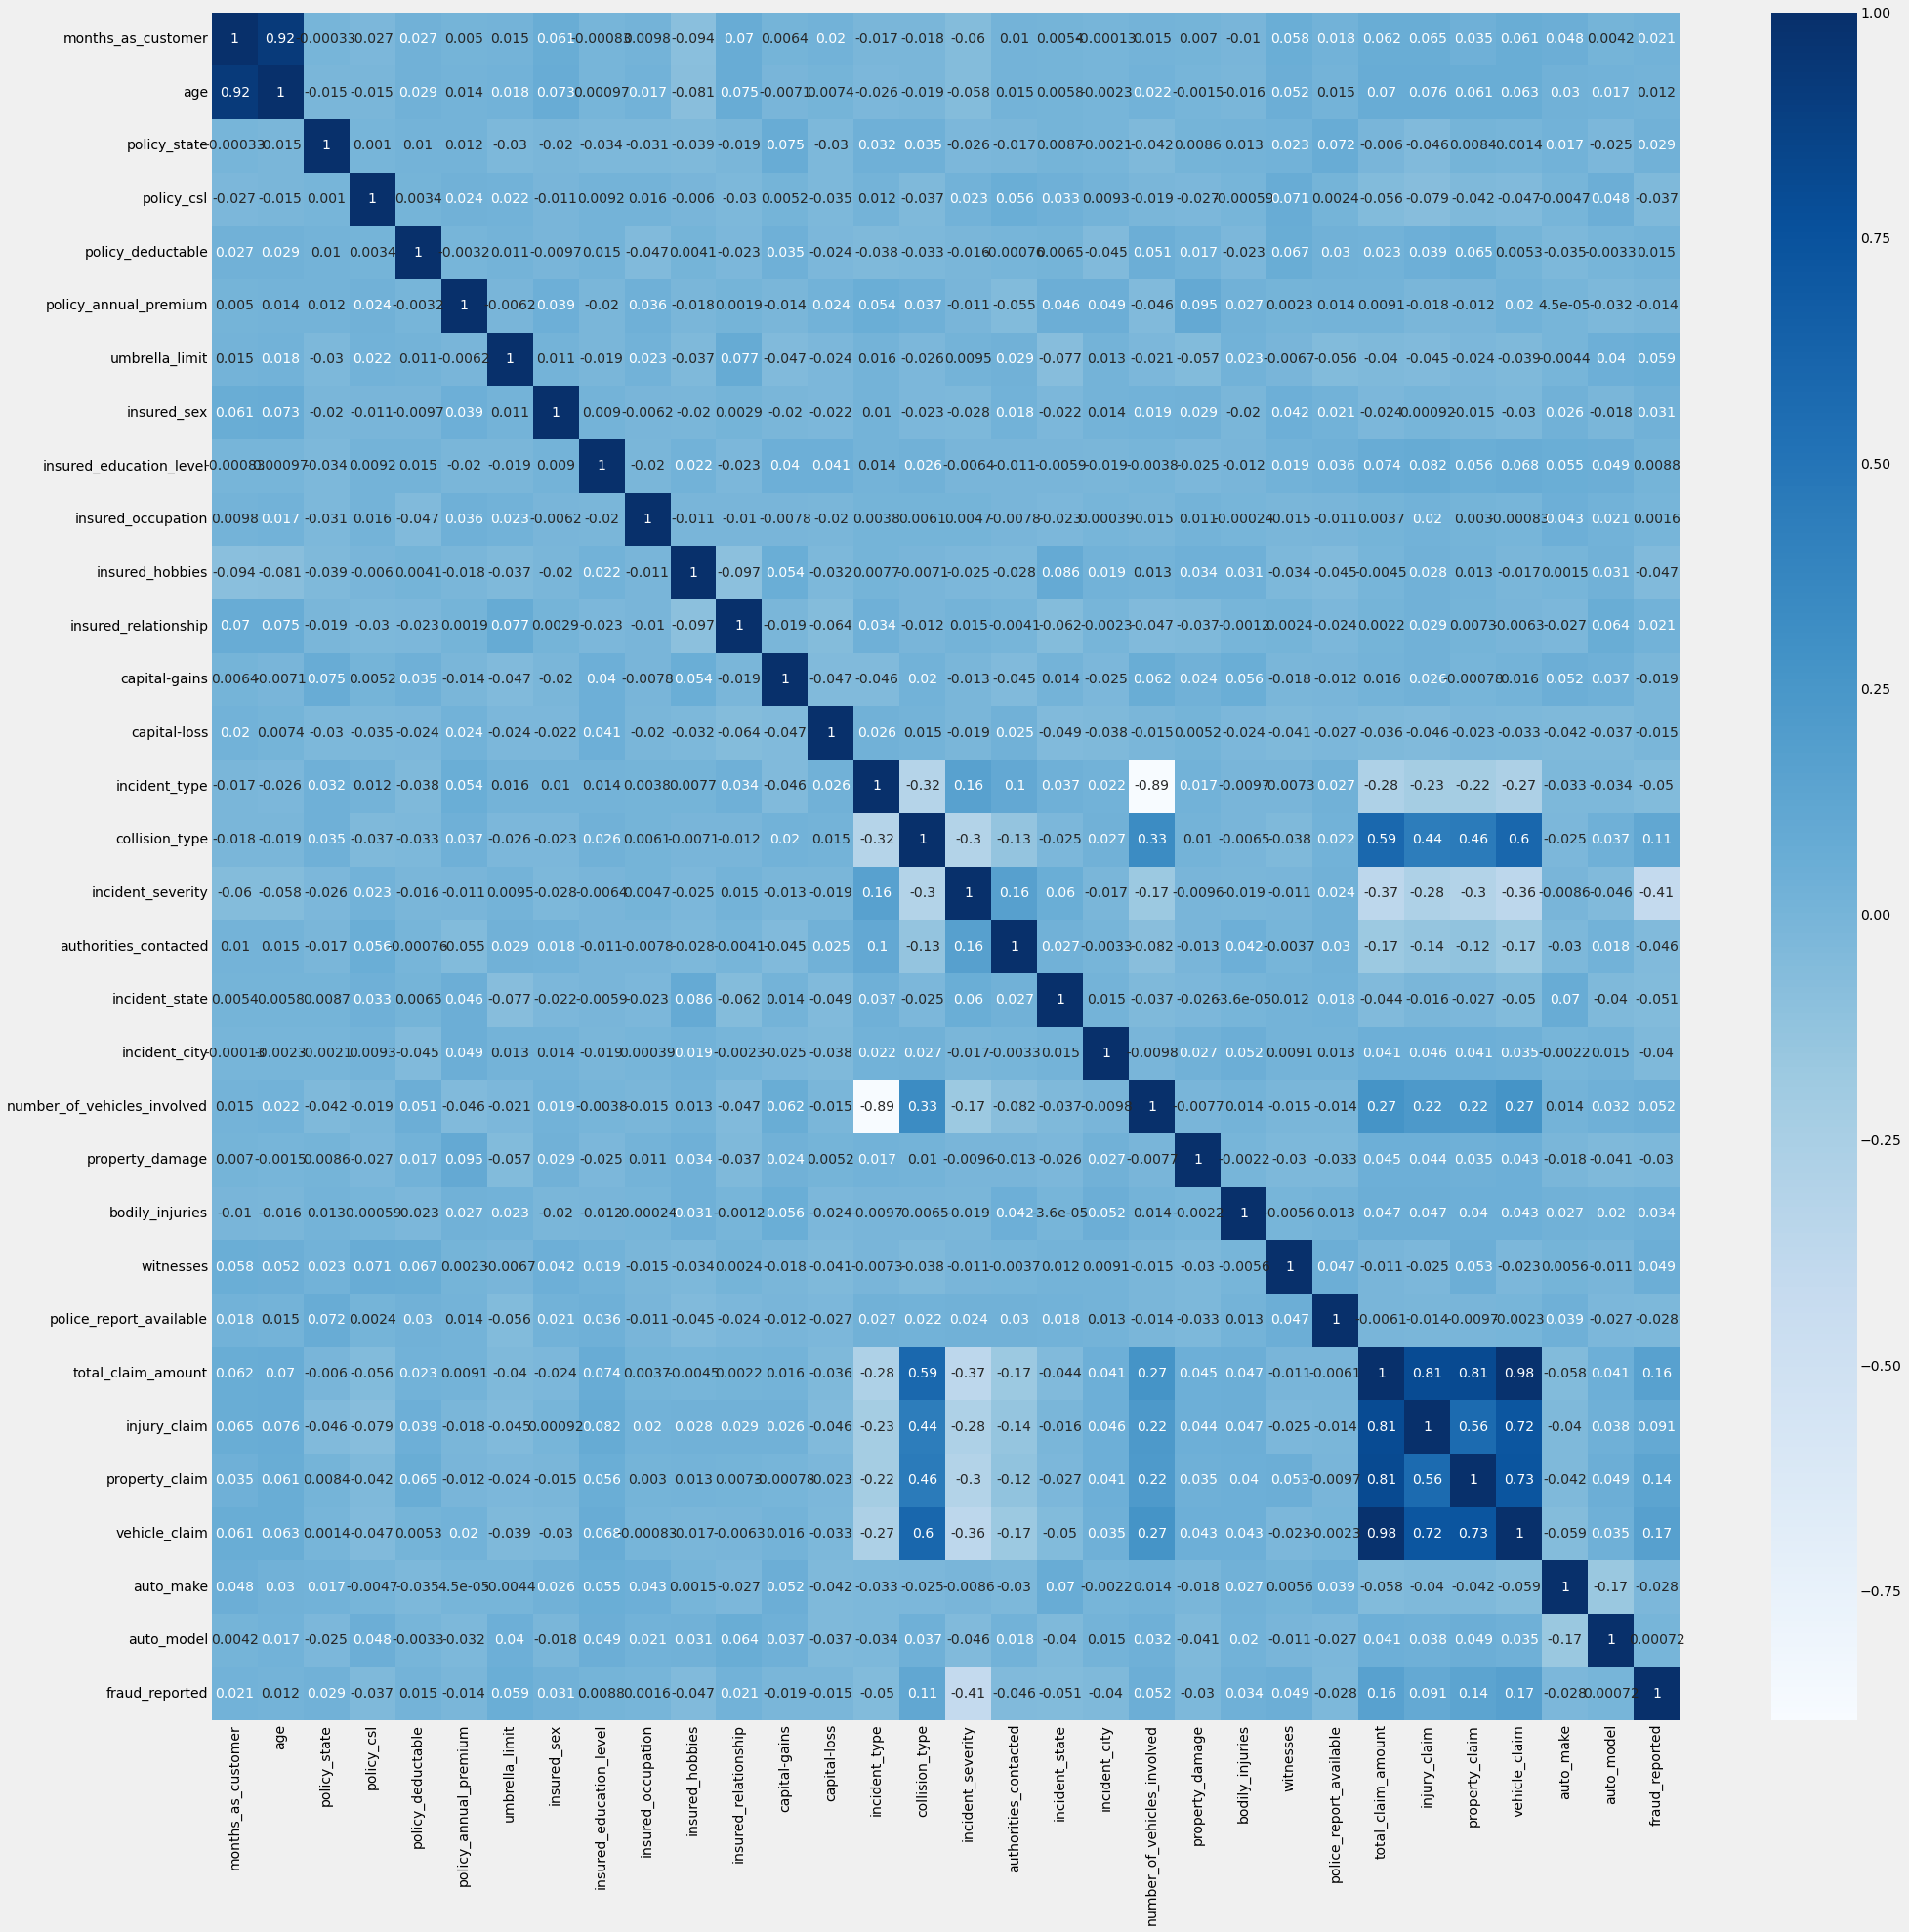

In [113]:
plt.figure(figsize=(30,30))          
sns.heatmap(dfcor,cmap='Blues',annot=True)   

In [79]:
X = df.drop(['fraud_reported'], axis = 1)
Y = df['fraud_reported']

# Standard scaling 

In [80]:
from sklearn.preprocessing import StandardScaler
for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

In [81]:
round(Y.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

0    75.3 %
1    24.7 %
Name: fraud_reported, dtype: object

# Balance the dataset

In [82]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [83]:
ros.fit(X, Y)

RandomOverSampler(random_state=42)

In [84]:
X_resampled, Y_resampled = ros.fit_resample(X, Y)

In [85]:
round(Y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

1    50.0 %
0    50.0 %
Name: fraud_reported, dtype: object

# Importing the ML model

In [86]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Train_Test_Split and Best Random state

In [87]:
maxAccu=0  ## maximum accuracy
maxRS=0   ## best random state value for which max accuracy is achieved

for i in range(1,200):
    X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(X_train,Y_train)   ## fitting the data will train your model
    predrf=LR.predict(X_test)   ## this is the predicted target variable
    acc=accuracy_score(Y_test,predrf)  ## accuracy score
    print('accuracy',acc,'random_state',i)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
        ## print('accuracy',maxAccu, 'random_state' i)

accuracy 0.755 random_state 1
accuracy 0.8 random_state 2
accuracy 0.79 random_state 3
accuracy 0.735 random_state 4
accuracy 0.765 random_state 5
accuracy 0.8 random_state 6
accuracy 0.765 random_state 7
accuracy 0.785 random_state 8
accuracy 0.785 random_state 9
accuracy 0.78 random_state 10
accuracy 0.73 random_state 11
accuracy 0.78 random_state 12
accuracy 0.815 random_state 13
accuracy 0.745 random_state 14
accuracy 0.79 random_state 15
accuracy 0.81 random_state 16
accuracy 0.775 random_state 17
accuracy 0.805 random_state 18
accuracy 0.77 random_state 19
accuracy 0.8 random_state 20
accuracy 0.675 random_state 21
accuracy 0.79 random_state 22
accuracy 0.73 random_state 23
accuracy 0.73 random_state 24
accuracy 0.76 random_state 25
accuracy 0.79 random_state 26
accuracy 0.78 random_state 27
accuracy 0.775 random_state 28
accuracy 0.775 random_state 29
accuracy 0.795 random_state 30
accuracy 0.815 random_state 31
accuracy 0.715 random_state 32
accuracy 0.745 random_state 33
accur

In [88]:
print("Best accuracy is ", maxAccu," on Random_state",maxRS)

Best accuracy is  0.86  on Random_state 65


In [89]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.20,random_state=65)

In [90]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(X_train,Y_train) 
predlr=LR.predict(X_test)
print("--------------Result of LogisticRegression---------------------")
print("Accuracy",accuracy_score(Y_test,predlr)*100)
print(confusion_matrix(Y_test,predlr))
print(classification_report(Y_test,predlr))

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
preddt=dt.predict(X_test)
print("--------------Result of DecisionTreeClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,preddt)*100)
print(confusion_matrix(Y_test,preddt))
print(classification_report(Y_test,preddt))

from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train) 
predrf=rf.predict(X_test)
print("--------------Result of RandomForestClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predrf)*100)
print(confusion_matrix(Y_test,predrf))
print(classification_report(Y_test,predrf))


from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,Y_train) 
predsvc=svc.predict(X_test)
print("--------------Result of SVC---------------------")
print("Accuracy",accuracy_score(Y_test,predsvc)*100)
print(confusion_matrix(Y_test,predsvc))
print(classification_report(Y_test,predsvc))

from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier()
KN.fit(X_train,Y_train) 
predKN=svc.predict(X_test)
print("--------------Result of KNeighborsClassifier---------------------")
print("Accuracy",accuracy_score(Y_test,predKN)*100)
print(confusion_matrix(Y_test,predKN))
print(classification_report(Y_test,predKN))

from sklearn.naive_bayes import GaussianNB
GNB=KNeighborsClassifier()
GNB.fit(X_train,Y_train) 
predGNB=svc.predict(X_test)
print("--------------Result of GaussianNB---------------------")
print("Accuracy",accuracy_score(Y_test,predGNB)*100)
print(confusion_matrix(Y_test,predGNB))
print(classification_report(Y_test,predGNB))


--------------Result of LogisticRegression---------------------
Accuracy 86.0
[[152   7]
 [ 21  20]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       159
           1       0.74      0.49      0.59        41

    accuracy                           0.86       200
   macro avg       0.81      0.72      0.75       200
weighted avg       0.85      0.86      0.85       200

--------------Result of DecisionTreeClassifier---------------------
Accuracy 80.0
[[136  23]
 [ 17  24]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       159
           1       0.51      0.59      0.55        41

    accuracy                           0.80       200
   macro avg       0.70      0.72      0.71       200
weighted avg       0.81      0.80      0.80       200

--------------Result of RandomForestClassifier---------------------
Accuracy 82.5
[[149  10]
 [ 25  16]]
              precision    recall  

# Cross validation

In [91]:
from sklearn.model_selection import cross_val_score

scr1=cross_val_score(LR,X,Y,cv=5)
scr2=cross_val_score(dt,X,Y,cv=5)
scr3=cross_val_score(rf,X,Y,cv=5)
scr4=cross_val_score(svc,X,Y,cv=5)
scr5=cross_val_score(KN,X,Y,cv=5)
scr6=cross_val_score(GNB,X,Y,cv=5)


print("Cross Validation score of Logistic Regresssion model : ",scr1.mean())
print("Cross Validation score of Decision Tree Classifier : ",scr2.mean())
print("Cross Validation score of Random Forest Classifier : ",scr3.mean())
print("Cross Validation score of SVC : ",scr4.mean())
print("Cross Validation score of KNeighbors classifier : ",scr5.mean())
print("Cross Validation score of GaussianNB : ",scr6.mean())

Cross Validation score of Logistic Regresssion model :  0.773
Cross Validation score of Decision Tree Classifier :  0.791
Cross Validation score of Random Forest Classifier :  0.768
Cross Validation score of SVC :  0.75
Cross Validation score of KNeighbors classifier :  0.733
Cross Validation score of GaussianNB :  0.733


# Hyperparameter Tunning with GridSearchCV

In [92]:
RandomForestClassifier()

RandomForestClassifier()

In [93]:
from sklearn.model_selection import GridSearchCV

## creating parameter list to pass in GridSearchCv

parameters= {'max_features':['auto','sqrt','log2'],
            'max_depth':[100,200,300,400,500],
            'criterion':['gini','entropy']}

In [94]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(X_train,Y_train)  ## fitiing the data in model
GCV.best_params_   ## Printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 300, 'max_features': 'log2'}

In [95]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [96]:
GCV.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=300, max_features='log2')

In [97]:
GCV_pred=GCV.best_estimator_.predict(X_test)   ## predicting with best parameters
accuracy_score(Y_test,GCV_pred) ## Checking final accuracy

0.8

# AUC_ROC CURVE

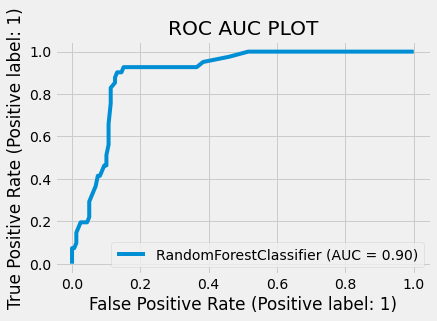

In [98]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,X_test,Y_test)
plt.title("ROC AUC PLOT")
plt.show()

# AdaBoostClassifier

In [99]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 85.0
[[144  15]
 [ 15  26]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       159
           1       0.63      0.63      0.63        41

    accuracy                           0.85       200
   macro avg       0.77      0.77      0.77       200
weighted avg       0.85      0.85      0.85       200



# Cross validation with AdaBoost

In [101]:
scr7=cross_val_score(ad,X,Y,cv=5)
print("Cross Validation score of AdaBoostClassifier : ",scr7.mean())

Cross Validation score of AdaBoostClassifier :  0.795


In [105]:
ad=AdaBoostClassifier(n_estimators=200)
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 85.0
[[145  14]
 [ 16  25]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.91       159
           1       0.64      0.61      0.62        41

    accuracy                           0.85       200
   macro avg       0.77      0.76      0.77       200
weighted avg       0.85      0.85      0.85       200



# AdaBoost Classifier with Support Vector Classifier

In [106]:
from sklearn.svm import SVC
svc=SVC()

ad=AdaBoostClassifier(n_estimators=100,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,Y_train) 
predad=ad.predict(X_test)
print("Accuracy",accuracy_score(Y_test,predad)*100)
print(confusion_matrix(Y_test,predad))
print(classification_report(Y_test,predad))

Accuracy 79.5
[[159   0]
 [ 41   0]]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       159
           1       0.00      0.00      0.00        41

    accuracy                           0.80       200
   macro avg       0.40      0.50      0.44       200
weighted avg       0.63      0.80      0.70       200



# Conclusion

Random Forest Classifier is the best for this dataset.

# Saving the model in pickle format

In [107]:
## PICKeling of file or serialization of a file

import joblib
joblib.dump(GCV.best_estimator_,"Automobile_insurance_fraud.pkl")

['Automobile_insurance_fraud.pkl']